In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
s_weather_df = pd.read_csv('SWeather2018.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_df)

,Datum,MedTemp,MaxTemp,MinTemp,Niederschlag,Monat,MedGlobalstrahlung,MedStarhlungBilanz
0,01.01.2014,6.2,9.8,2.4,0.00,1.0,44.9,-17.8
1,02.01.2014,7.0,10.0,4.8,1.60,1.0,24.3,-37.1
2,03.01.2014,7.8,10.8,4.3,0.30,1.0,22.4,-35.1
3,04.01.2014,7.7,9.7,5.6,1.33,1.0,11.9,-31.8
4,05.01.2014,5.8,8.6,1.4,0.72,1.0,29.1,-41.2
...,...,...,...,...,...,...,...,...
1885,01.03.2019,9.2,11.9,7.6,5.60,3.0,51.9,-1.5
1886,02.03.2019,9.2,12.3,7.1,0.00,3.0,54.0,16.4
1887,03.03.2019,11.1,13.6,7.7,0.00,3.0,59.6,11.6
1888,04.03.2019,9.9,14.3,4.8,4.40,3.0,72.0,-0.6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


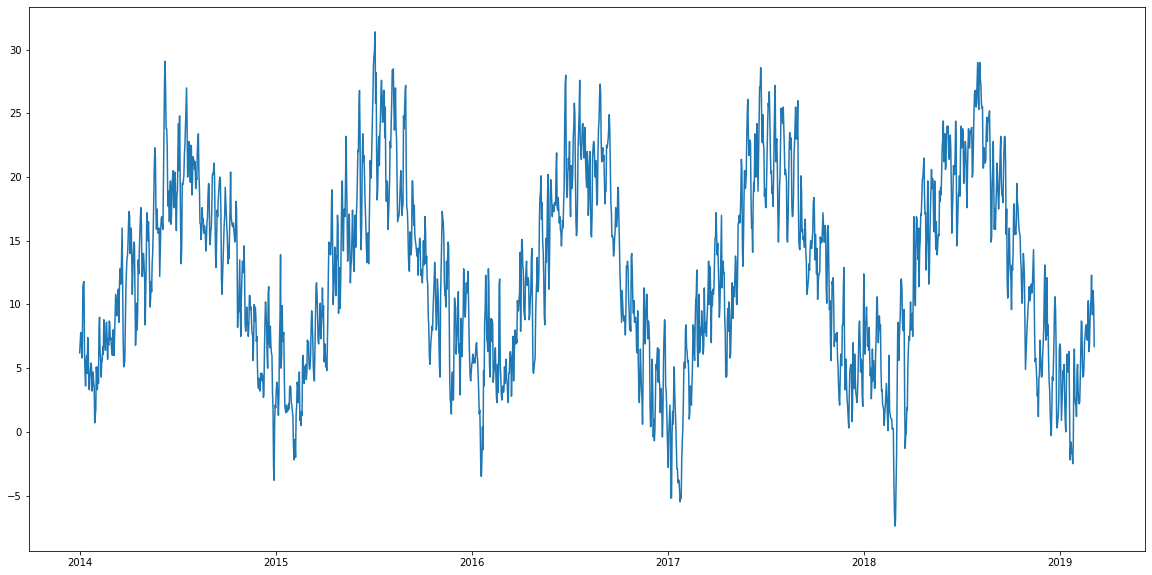

In [4]:
med_temp = s_weather_df['MedTemp']
dates = np.arange('2014-01-01', '2019-03-06', dtype='datetime64[D]')
plt.plot(dates, med_temp)
plt.show()
# plt.savefig('stuttgart_history.pdf')

In [5]:
s = s_weather_df['MedTemp']

In [7]:
lastN = 3
until = 1
#cols = [1, 2, 3, 4, 5, 6, 7]
cols = [1]

x = []
for i in range(lastN, s.size):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df.iloc[k, j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size):
    y.append([s_weather_df.iloc[i, 1]])

for i in range(len(x)):    
    print(i, x[i], y[i])

0 [6.2, 7.0, 7.8] [7.7]
1 [7.0, 7.8, 7.7] [5.8]
2 [7.8, 7.7, 5.8] [7.1]
3 [7.7, 5.8, 7.1] [11.4]
4 [5.8, 7.1, 11.4] [11.7]
5 [7.1, 11.4, 11.7] [11.8]
6 [11.4, 11.7, 11.8] [6.1]
7 [11.7, 11.8, 6.1] [4.6]
8 [11.8, 6.1, 4.6] [3.6]
9 [6.1, 4.6, 3.6] [5.5]
10 [4.6, 3.6, 5.5] [6.0]
11 [3.6, 5.5, 6.0] [4.6]
12 [5.5, 6.0, 4.6] [7.4]
13 [6.0, 4.6, 7.4] [6.5]
14 [4.6, 7.4, 6.5] [3.5]
15 [7.4, 6.5, 3.5] [3.3]
16 [6.5, 3.5, 3.3] [4.2]
17 [3.5, 3.3, 4.2] [4.9]
18 [3.3, 4.2, 4.9] [5.4]
19 [4.2, 4.9, 5.4] [5.1]
20 [4.9, 5.4, 5.1] [3.2]
21 [5.4, 5.1, 3.2] [3.7]
22 [5.1, 3.2, 3.7] [4.7]
23 [3.2, 3.7, 4.7] [3.9]
24 [3.7, 4.7, 3.9] [3.6]
25 [4.7, 3.9, 3.6] [0.7]
26 [3.9, 3.6, 0.7] [1.3]
27 [3.6, 0.7, 1.3] [1.7]
28 [0.7, 1.3, 1.7] [5.1]
29 [1.3, 1.7, 5.1] [4.2]
30 [1.7, 5.1, 4.2] [3.3]
31 [5.1, 4.2, 3.3] [5.1]
32 [4.2, 3.3, 5.1] [3.8]
33 [3.3, 5.1, 3.8] [8.1]
34 [5.1, 3.8, 8.1] [9.0]
35 [3.8, 8.1, 9.0] [6.2]
36 [8.1, 9.0, 6.2] [5.8]
37 [9.0, 6.2, 5.8] [4.3]
38 [6.2, 5.8, 4.3] [5.4]
39 [5.8, 4.3, 5.4] [5.6

428 [4.9, 5.1, 6.1] [8.3]
429 [5.1, 6.1, 8.3] [9.5]
430 [6.1, 8.3, 9.5] [8.6]
431 [8.3, 9.5, 8.6] [7.3]
432 [9.5, 8.6, 7.3] [5.1]
433 [8.6, 7.3, 5.1] [4.3]
434 [7.3, 5.1, 4.3] [4.0]
435 [5.1, 4.3, 4.0] [6.4]
436 [4.3, 4.0, 6.4] [8.8]
437 [4.0, 6.4, 8.8] [11.3]
438 [6.4, 8.8, 11.3] [11.7]
439 [8.8, 11.3, 11.7] [10.7]
440 [11.3, 11.7, 10.7] [9.2]
441 [11.7, 10.7, 9.2] [7.1]
442 [10.7, 9.2, 7.1] [6.9]
443 [9.2, 7.1, 6.9] [7.8]
444 [7.1, 6.9, 7.8] [9.1]
445 [6.9, 7.8, 9.1] [10.1]
446 [7.8, 9.1, 10.1] [7.3]
447 [9.1, 10.1, 7.3] [8.2]
448 [10.1, 7.3, 8.2] [9.0]
449 [7.3, 8.2, 9.0] [11.3]
450 [8.2, 9.0, 11.3] [9.0]
451 [9.0, 11.3, 9.0] [9.9]
452 [11.3, 9.0, 9.9] [5.5]
453 [9.0, 9.9, 5.5] [5.8]
454 [9.9, 5.5, 5.8] [6.9]
455 [5.5, 5.8, 6.9] [5.1]
456 [5.8, 6.9, 5.1] [5.8]
457 [6.9, 5.1, 5.8] [4.8]
458 [5.1, 5.8, 4.8] [6.4]
459 [5.8, 4.8, 6.4] [8.9]
460 [4.8, 6.4, 8.9] [12.3]
461 [6.4, 8.9, 12.3] [14.9]
462 [8.9, 12.3, 14.9] [14.7]
463 [12.3, 14.9, 14.7] [14.8]
464 [14.9, 14.7, 14.8] [13.9]
465 

761 [12.8, 11.2, 5.3] [4.3]
762 [11.2, 5.3, 4.3] [7.3]
763 [5.3, 4.3, 7.3] [8.9]
764 [4.3, 7.3, 8.9] [7.1]
765 [7.3, 8.9, 7.1] [8.8]
766 [8.9, 7.1, 8.8] [8.5]
767 [7.1, 8.8, 8.5] [3.9]
768 [8.8, 8.5, 3.9] [4.6]
769 [8.5, 3.9, 4.6] [4.9]
770 [3.9, 4.6, 4.9] [6.0]
771 [4.6, 4.9, 6.0] [6.6]
772 [4.9, 6.0, 6.6] [4.3]
773 [6.0, 6.6, 4.3] [2.7]
774 [6.6, 4.3, 2.7] [2.3]
775 [4.3, 2.7, 2.3] [5.3]
776 [2.7, 2.3, 5.3] [3.1]
777 [2.3, 5.3, 3.1] [4.7]
778 [5.3, 3.1, 4.7] [11.5]
779 [3.1, 4.7, 11.5] [12.0]
780 [4.7, 11.5, 12.0] [5.4]
781 [11.5, 12.0, 5.4] [4.4]
782 [12.0, 5.4, 4.4] [3.0]
783 [5.4, 4.4, 3.0] [2.5]
784 [4.4, 3.0, 2.5] [3.2]
785 [3.0, 2.5, 3.2] [3.6]
786 [2.5, 3.2, 3.6] [3.1]
787 [3.2, 3.6, 3.1] [3.3]
788 [3.6, 3.1, 3.3] [5.1]
789 [3.1, 3.3, 5.1] [3.8]
790 [3.3, 5.1, 3.8] [4.6]
791 [5.1, 3.8, 4.6] [5.7]
792 [3.8, 4.6, 5.7] [4.1]
793 [4.6, 5.7, 4.1] [3.9]
794 [5.7, 4.1, 3.9] [2.7]
795 [4.1, 3.9, 2.7] [2.3]
796 [3.9, 2.7, 2.3] [4.6]
797 [2.7, 2.3, 4.6] [4.6]
798 [2.3, 4.6, 4.6] [6.1]
7

1094 [-0.2, -1.7, -2.8] [0.0]
1095 [-1.7, -2.8, 0.0] [1.1]
1096 [-2.8, 0.0, 1.1] [2.1]
1097 [0.0, 1.1, 2.1] [0.2]
1098 [1.1, 2.1, 0.2] [-5.2]
1099 [2.1, 0.2, -5.2] [-5.2]
1100 [0.2, -5.2, -5.2] [-0.1]
1101 [-5.2, -5.2, -0.1] [1.6]
1102 [-5.2, -0.1, 1.6] [0.6]
1103 [-0.1, 1.6, 0.6] [3.2]
1104 [1.6, 0.6, 3.2] [5.1]
1105 [0.6, 3.2, 5.1] [2.9]
1106 [3.2, 5.1, 2.9] [1.7]
1107 [5.1, 2.9, 1.7] [0.5]
1108 [2.9, 1.7, 0.5] [-1.3]
1109 [1.7, 0.5, -1.3] [-2.9]
1110 [0.5, -1.3, -2.9] [-2.9]
1111 [-1.3, -2.9, -2.9] [-4.0]
1112 [-2.9, -2.9, -4.0] [-3.8]
1113 [-2.9, -4.0, -3.8] [-3.8]
1114 [-4.0, -3.8, -3.8] [-4.6]
1115 [-3.8, -3.8, -4.6] [-5.5]
1116 [-3.8, -4.6, -5.5] [-5.1]
1117 [-4.6, -5.5, -5.1] [-5.2]
1118 [-5.5, -5.1, -5.2] [-2.1]
1119 [-5.1, -5.2, -2.1] [-0.8]
1120 [-5.2, -2.1, -0.8] [0.2]
1121 [-2.1, -0.8, 0.2] [2.3]
1122 [-0.8, 0.2, 2.3] [5.2]
1123 [0.2, 2.3, 5.2] [5.5]
1124 [2.3, 5.2, 5.5] [5.0]
1125 [5.2, 5.5, 5.0] [8.0]
1126 [5.5, 5.0, 8.0] [8.4]
1127 [5.0, 8.0, 8.4] [6.6]
1128 [8.0, 8.4, 

1428 [3.5, 2.5, 1.9] [1.0]
1429 [2.5, 1.9, 1.0] [0.3]
1430 [1.9, 1.0, 0.3] [2.9]
1431 [1.0, 0.3, 2.9] [4.8]
1432 [0.3, 2.9, 4.8] [5.1]
1433 [2.9, 4.8, 5.1] [5.3]
1434 [4.8, 5.1, 5.3] [4.8]
1435 [5.1, 5.3, 4.8] [0.8]
1436 [5.3, 4.8, 0.8] [1.9]
1437 [4.8, 0.8, 1.9] [7.0]
1438 [0.8, 1.9, 7.0] [4.5]
1439 [1.9, 7.0, 4.5] [3.4]
1440 [7.0, 4.5, 3.4] [6.1]
1441 [4.5, 3.4, 6.1] [4.4]
1442 [3.4, 6.1, 4.4] [3.1]
1443 [6.1, 4.4, 3.1] [2.8]
1444 [4.4, 3.1, 2.8] [2.3]
1445 [3.1, 2.8, 2.3] [2.8]
1446 [2.8, 2.3, 2.8] [4.0]
1447 [2.3, 2.8, 4.0] [6.0]
1448 [2.8, 4.0, 6.0] [8.1]
1449 [4.0, 6.0, 8.1] [8.7]
1450 [6.0, 8.1, 8.7] [7.1]
1451 [8.1, 8.7, 7.1] [4.7]
1452 [8.7, 7.1, 4.7] [5.7]
1453 [7.1, 4.7, 5.7] [5.5]
1454 [4.7, 5.7, 5.5] [2.9]
1455 [5.7, 5.5, 2.9] [2.0]
1456 [5.5, 2.9, 2.0] [7.6]
1457 [2.9, 2.0, 7.6] [12.4]
1458 [2.0, 7.6, 12.4] [8.4]
1459 [7.6, 12.4, 8.4] [6.1]
1460 [12.4, 8.4, 6.1] [8.6]
1461 [8.4, 6.1, 8.6] [8.7]
1462 [6.1, 8.6, 8.7] [9.8]
1463 [8.6, 8.7, 9.8] [8.3]
1464 [8.7, 9.8, 8.3] [6.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler().fit(x)
scalery = MinMaxScaler().fit(y)
x = scalerX.transform(x)
y = scalery.transform(y)



In [9]:
print(x)

[[0.35051546 0.37113402 0.39175258]
 [0.37113402 0.39175258 0.38917526]
 [0.39175258 0.38917526 0.34020619]
 ...
 [0.50773196 0.42783505 0.42783505]
 [0.42783505 0.42783505 0.47680412]
 [0.42783505 0.47680412 0.44587629]]


In [10]:
print(y)

[[0.38917526]
 [0.34020619]
 [0.37371134]
 ...
 [0.47680412]
 [0.44587629]
 [0.36340206]]


In [11]:
layer = (32, 32, 32)
#model = MLPRegressor(layer, max_iter=5000, activation='logistic', solver='adam', verbose=True, n_iter_no_change=10, tol=0.0001)
model = MLPRegressor(layer, max_iter=5000, batch_size=64, activation='logistic', solver='adam', verbose=True, n_iter_no_change=200, tol=1e-9)
model.fit(x, y.ravel())

Iteration 1, loss = 0.06123878
Iteration 2, loss = 0.01928585
Iteration 3, loss = 0.01801619
Iteration 4, loss = 0.01790800
Iteration 5, loss = 0.01771396
Iteration 6, loss = 0.01763823
Iteration 7, loss = 0.01756191
Iteration 8, loss = 0.01744620
Iteration 9, loss = 0.01728318
Iteration 10, loss = 0.01710398
Iteration 11, loss = 0.01693644
Iteration 12, loss = 0.01650682
Iteration 13, loss = 0.01607677
Iteration 14, loss = 0.01549780
Iteration 15, loss = 0.01470608
Iteration 16, loss = 0.01381836
Iteration 17, loss = 0.01249283
Iteration 18, loss = 0.01089784
Iteration 19, loss = 0.00906079
Iteration 20, loss = 0.00702503
Iteration 21, loss = 0.00522108
Iteration 22, loss = 0.00378651
Iteration 23, loss = 0.00301993
Iteration 24, loss = 0.00263175
Iteration 25, loss = 0.00253154
Iteration 26, loss = 0.00248019
Iteration 27, loss = 0.00243064
Iteration 28, loss = 0.00243879
Iteration 29, loss = 0.00242704
Iteration 30, loss = 0.00238995
Iteration 31, loss = 0.00238173
Iteration 32, los

Iteration 258, loss = 0.00151883
Iteration 259, loss = 0.00155112
Iteration 260, loss = 0.00151067
Iteration 261, loss = 0.00154776
Iteration 262, loss = 0.00154186
Iteration 263, loss = 0.00151238
Iteration 264, loss = 0.00151757
Iteration 265, loss = 0.00160634
Iteration 266, loss = 0.00157857
Iteration 267, loss = 0.00151469
Iteration 268, loss = 0.00150065
Iteration 269, loss = 0.00165382
Iteration 270, loss = 0.00152249
Iteration 271, loss = 0.00151891
Iteration 272, loss = 0.00151313
Iteration 273, loss = 0.00153174
Iteration 274, loss = 0.00150211
Iteration 275, loss = 0.00151905
Iteration 276, loss = 0.00154233
Iteration 277, loss = 0.00151264
Iteration 278, loss = 0.00149010
Iteration 279, loss = 0.00153454
Iteration 280, loss = 0.00153390
Iteration 281, loss = 0.00154751
Iteration 282, loss = 0.00151998
Iteration 283, loss = 0.00150262
Iteration 284, loss = 0.00154892
Iteration 285, loss = 0.00157615
Iteration 286, loss = 0.00152918
Iteration 287, loss = 0.00158868
Iteration 

Iteration 511, loss = 0.00150501
Iteration 512, loss = 0.00148889
Iteration 513, loss = 0.00149586
Iteration 514, loss = 0.00147514
Iteration 515, loss = 0.00150116
Iteration 516, loss = 0.00159140
Iteration 517, loss = 0.00152064
Iteration 518, loss = 0.00149365
Iteration 519, loss = 0.00147355
Iteration 520, loss = 0.00148676
Iteration 521, loss = 0.00147601
Iteration 522, loss = 0.00148210
Iteration 523, loss = 0.00146769
Iteration 524, loss = 0.00153735
Iteration 525, loss = 0.00152252
Iteration 526, loss = 0.00146839
Iteration 527, loss = 0.00151191
Iteration 528, loss = 0.00154469
Iteration 529, loss = 0.00148950
Iteration 530, loss = 0.00147479
Iteration 531, loss = 0.00147836
Iteration 532, loss = 0.00156008
Iteration 533, loss = 0.00148705
Iteration 534, loss = 0.00147373
Iteration 535, loss = 0.00146701
Iteration 536, loss = 0.00146951
Iteration 537, loss = 0.00148714
Iteration 538, loss = 0.00150508
Iteration 539, loss = 0.00152164
Iteration 540, loss = 0.00151272
Iteration 

Iteration 762, loss = 0.00153066
Iteration 763, loss = 0.00153959
Iteration 764, loss = 0.00147715
Iteration 765, loss = 0.00148663
Iteration 766, loss = 0.00150561
Iteration 767, loss = 0.00154996
Iteration 768, loss = 0.00150956
Iteration 769, loss = 0.00146700
Iteration 770, loss = 0.00149196
Iteration 771, loss = 0.00147836
Iteration 772, loss = 0.00146021
Iteration 773, loss = 0.00148204
Iteration 774, loss = 0.00147178
Iteration 775, loss = 0.00147811
Iteration 776, loss = 0.00147049
Iteration 777, loss = 0.00146136
Iteration 778, loss = 0.00150493
Iteration 779, loss = 0.00146962
Iteration 780, loss = 0.00151863
Iteration 781, loss = 0.00147509
Iteration 782, loss = 0.00149435
Iteration 783, loss = 0.00155904
Iteration 784, loss = 0.00147051
Iteration 785, loss = 0.00149301
Iteration 786, loss = 0.00146806
Iteration 787, loss = 0.00149049
Iteration 788, loss = 0.00151517
Iteration 789, loss = 0.00148394
Iteration 790, loss = 0.00147808
Iteration 791, loss = 0.00146775
Iteration 

Iteration 1012, loss = 0.00152101
Iteration 1013, loss = 0.00154422
Iteration 1014, loss = 0.00148366
Iteration 1015, loss = 0.00147153
Iteration 1016, loss = 0.00146903
Iteration 1017, loss = 0.00148974
Iteration 1018, loss = 0.00148319
Iteration 1019, loss = 0.00148451
Iteration 1020, loss = 0.00151310
Iteration 1021, loss = 0.00150296
Iteration 1022, loss = 0.00149684
Iteration 1023, loss = 0.00146336
Iteration 1024, loss = 0.00148042
Iteration 1025, loss = 0.00146423
Iteration 1026, loss = 0.00151569
Iteration 1027, loss = 0.00146894
Iteration 1028, loss = 0.00150427
Iteration 1029, loss = 0.00160540
Iteration 1030, loss = 0.00156470
Iteration 1031, loss = 0.00149390
Iteration 1032, loss = 0.00151747
Iteration 1033, loss = 0.00150416
Iteration 1034, loss = 0.00149977
Iteration 1035, loss = 0.00151082
Iteration 1036, loss = 0.00149157
Iteration 1037, loss = 0.00148814
Iteration 1038, loss = 0.00147510
Iteration 1039, loss = 0.00147833
Iteration 1040, loss = 0.00146162
Iteration 1041

Iteration 1260, loss = 0.00147689
Iteration 1261, loss = 0.00146718
Iteration 1262, loss = 0.00153927
Iteration 1263, loss = 0.00149417
Iteration 1264, loss = 0.00147282
Iteration 1265, loss = 0.00148609
Iteration 1266, loss = 0.00147772
Iteration 1267, loss = 0.00151628
Iteration 1268, loss = 0.00148567
Iteration 1269, loss = 0.00150434
Iteration 1270, loss = 0.00153872
Iteration 1271, loss = 0.00155228
Iteration 1272, loss = 0.00148342
Iteration 1273, loss = 0.00150470
Iteration 1274, loss = 0.00148289
Iteration 1275, loss = 0.00148081
Iteration 1276, loss = 0.00148097
Iteration 1277, loss = 0.00148215
Iteration 1278, loss = 0.00151168
Iteration 1279, loss = 0.00147112
Iteration 1280, loss = 0.00147063
Iteration 1281, loss = 0.00151894
Iteration 1282, loss = 0.00146760
Iteration 1283, loss = 0.00149424
Iteration 1284, loss = 0.00149122
Iteration 1285, loss = 0.00147255
Iteration 1286, loss = 0.00147619
Iteration 1287, loss = 0.00146278
Iteration 1288, loss = 0.00155405
Iteration 1289

Iteration 1506, loss = 0.00151968
Iteration 1507, loss = 0.00147761
Iteration 1508, loss = 0.00148239
Iteration 1509, loss = 0.00152016
Iteration 1510, loss = 0.00148992
Iteration 1511, loss = 0.00147371
Iteration 1512, loss = 0.00151315
Iteration 1513, loss = 0.00148541
Iteration 1514, loss = 0.00145994
Iteration 1515, loss = 0.00147188
Iteration 1516, loss = 0.00146240
Iteration 1517, loss = 0.00145998
Iteration 1518, loss = 0.00146929
Iteration 1519, loss = 0.00146477
Iteration 1520, loss = 0.00148614
Iteration 1521, loss = 0.00148335
Iteration 1522, loss = 0.00146662
Iteration 1523, loss = 0.00151275
Iteration 1524, loss = 0.00148944
Iteration 1525, loss = 0.00145892
Iteration 1526, loss = 0.00148421
Iteration 1527, loss = 0.00147482
Iteration 1528, loss = 0.00146941
Iteration 1529, loss = 0.00150107
Iteration 1530, loss = 0.00150551
Iteration 1531, loss = 0.00149014
Iteration 1532, loss = 0.00145624
Iteration 1533, loss = 0.00151447
Iteration 1534, loss = 0.00149896
Iteration 1535

Iteration 1750, loss = 0.00147564
Iteration 1751, loss = 0.00147002
Iteration 1752, loss = 0.00146838
Iteration 1753, loss = 0.00150435
Iteration 1754, loss = 0.00150464
Iteration 1755, loss = 0.00147675
Iteration 1756, loss = 0.00148177
Iteration 1757, loss = 0.00148880
Iteration 1758, loss = 0.00148654
Iteration 1759, loss = 0.00147097
Iteration 1760, loss = 0.00147226
Iteration 1761, loss = 0.00146753
Iteration 1762, loss = 0.00155708
Iteration 1763, loss = 0.00147930
Iteration 1764, loss = 0.00149646
Iteration 1765, loss = 0.00148634
Iteration 1766, loss = 0.00146597
Iteration 1767, loss = 0.00149326
Iteration 1768, loss = 0.00145861
Iteration 1769, loss = 0.00145664
Iteration 1770, loss = 0.00150922
Iteration 1771, loss = 0.00150607
Iteration 1772, loss = 0.00156487
Iteration 1773, loss = 0.00156959
Iteration 1774, loss = 0.00146763
Iteration 1775, loss = 0.00147519
Iteration 1776, loss = 0.00148814
Iteration 1777, loss = 0.00147020
Iteration 1778, loss = 0.00146027
Iteration 1779

Iteration 1995, loss = 0.00150740
Iteration 1996, loss = 0.00146827
Iteration 1997, loss = 0.00148230
Iteration 1998, loss = 0.00153788
Iteration 1999, loss = 0.00148998
Iteration 2000, loss = 0.00148163
Iteration 2001, loss = 0.00145674
Iteration 2002, loss = 0.00147141
Iteration 2003, loss = 0.00146358
Iteration 2004, loss = 0.00148173
Iteration 2005, loss = 0.00146705
Iteration 2006, loss = 0.00150495
Iteration 2007, loss = 0.00147254
Iteration 2008, loss = 0.00151314
Iteration 2009, loss = 0.00151780
Iteration 2010, loss = 0.00148093
Iteration 2011, loss = 0.00147759
Iteration 2012, loss = 0.00146407
Iteration 2013, loss = 0.00147693
Iteration 2014, loss = 0.00146602
Iteration 2015, loss = 0.00147984
Iteration 2016, loss = 0.00148002
Iteration 2017, loss = 0.00147917
Iteration 2018, loss = 0.00145514
Iteration 2019, loss = 0.00147858
Iteration 2020, loss = 0.00149438
Iteration 2021, loss = 0.00146828
Iteration 2022, loss = 0.00146415
Iteration 2023, loss = 0.00146391
Iteration 2024

Iteration 2239, loss = 0.00148163
Iteration 2240, loss = 0.00147925
Iteration 2241, loss = 0.00146499
Iteration 2242, loss = 0.00148496
Iteration 2243, loss = 0.00151183
Iteration 2244, loss = 0.00146797
Iteration 2245, loss = 0.00147980
Iteration 2246, loss = 0.00145870
Iteration 2247, loss = 0.00147032
Iteration 2248, loss = 0.00145750
Iteration 2249, loss = 0.00148608
Iteration 2250, loss = 0.00149978
Iteration 2251, loss = 0.00146046
Iteration 2252, loss = 0.00147596
Iteration 2253, loss = 0.00154356
Iteration 2254, loss = 0.00148133
Iteration 2255, loss = 0.00147497
Iteration 2256, loss = 0.00145883
Iteration 2257, loss = 0.00147241
Iteration 2258, loss = 0.00149821
Iteration 2259, loss = 0.00150599
Iteration 2260, loss = 0.00145804
Iteration 2261, loss = 0.00146923
Iteration 2262, loss = 0.00155338
Iteration 2263, loss = 0.00149862
Iteration 2264, loss = 0.00151721
Iteration 2265, loss = 0.00145533
Iteration 2266, loss = 0.00148777
Iteration 2267, loss = 0.00148115
Iteration 2268

Iteration 2483, loss = 0.00146140
Iteration 2484, loss = 0.00148861
Iteration 2485, loss = 0.00145606
Iteration 2486, loss = 0.00151446
Iteration 2487, loss = 0.00147415
Iteration 2488, loss = 0.00149225
Iteration 2489, loss = 0.00148495
Iteration 2490, loss = 0.00145510
Iteration 2491, loss = 0.00146500
Iteration 2492, loss = 0.00145278
Iteration 2493, loss = 0.00148610
Iteration 2494, loss = 0.00150864
Iteration 2495, loss = 0.00147012
Iteration 2496, loss = 0.00152703
Iteration 2497, loss = 0.00173414
Iteration 2498, loss = 0.00154100
Iteration 2499, loss = 0.00148749
Iteration 2500, loss = 0.00148719
Iteration 2501, loss = 0.00148180
Iteration 2502, loss = 0.00147845
Iteration 2503, loss = 0.00153363
Iteration 2504, loss = 0.00145852
Iteration 2505, loss = 0.00151604
Iteration 2506, loss = 0.00146117
Iteration 2507, loss = 0.00147659
Iteration 2508, loss = 0.00146912
Iteration 2509, loss = 0.00150981
Iteration 2510, loss = 0.00150515
Iteration 2511, loss = 0.00148241
Iteration 2512

Iteration 2724, loss = 0.00146197
Iteration 2725, loss = 0.00150381
Iteration 2726, loss = 0.00152944
Iteration 2727, loss = 0.00145250
Iteration 2728, loss = 0.00145243
Iteration 2729, loss = 0.00148091
Iteration 2730, loss = 0.00149058
Iteration 2731, loss = 0.00146117
Iteration 2732, loss = 0.00147561
Iteration 2733, loss = 0.00146136
Iteration 2734, loss = 0.00148131
Iteration 2735, loss = 0.00147057
Iteration 2736, loss = 0.00147386
Iteration 2737, loss = 0.00147278
Iteration 2738, loss = 0.00146982
Iteration 2739, loss = 0.00146030
Iteration 2740, loss = 0.00145541
Iteration 2741, loss = 0.00148568
Iteration 2742, loss = 0.00148448
Iteration 2743, loss = 0.00149377
Iteration 2744, loss = 0.00149641
Iteration 2745, loss = 0.00145568
Iteration 2746, loss = 0.00145554
Iteration 2747, loss = 0.00145484
Iteration 2748, loss = 0.00146185
Iteration 2749, loss = 0.00147499
Iteration 2750, loss = 0.00153621
Iteration 2751, loss = 0.00144892
Iteration 2752, loss = 0.00149204
Iteration 2753

Iteration 2967, loss = 0.00146166
Iteration 2968, loss = 0.00146626
Iteration 2969, loss = 0.00148657
Iteration 2970, loss = 0.00152119
Iteration 2971, loss = 0.00146017
Iteration 2972, loss = 0.00145331
Iteration 2973, loss = 0.00147293
Iteration 2974, loss = 0.00146823
Iteration 2975, loss = 0.00150023
Iteration 2976, loss = 0.00155370
Iteration 2977, loss = 0.00147376
Iteration 2978, loss = 0.00146828
Iteration 2979, loss = 0.00147575
Iteration 2980, loss = 0.00148715
Iteration 2981, loss = 0.00146944
Iteration 2982, loss = 0.00147385
Iteration 2983, loss = 0.00147017
Iteration 2984, loss = 0.00152170
Iteration 2985, loss = 0.00147189
Iteration 2986, loss = 0.00144991
Iteration 2987, loss = 0.00146394
Iteration 2988, loss = 0.00147469
Iteration 2989, loss = 0.00147633
Iteration 2990, loss = 0.00150189
Iteration 2991, loss = 0.00146256
Iteration 2992, loss = 0.00146231
Iteration 2993, loss = 0.00149344
Iteration 2994, loss = 0.00154526
Iteration 2995, loss = 0.00145751
Iteration 2996

Iteration 3215, loss = 0.00146883
Iteration 3216, loss = 0.00148963
Iteration 3217, loss = 0.00147364
Iteration 3218, loss = 0.00147201
Iteration 3219, loss = 0.00148297
Iteration 3220, loss = 0.00151337
Iteration 3221, loss = 0.00157385
Iteration 3222, loss = 0.00146845
Iteration 3223, loss = 0.00145235
Iteration 3224, loss = 0.00145052
Iteration 3225, loss = 0.00146853
Iteration 3226, loss = 0.00144991
Iteration 3227, loss = 0.00146001
Iteration 3228, loss = 0.00146676
Iteration 3229, loss = 0.00148015
Iteration 3230, loss = 0.00148093
Iteration 3231, loss = 0.00149992
Iteration 3232, loss = 0.00145813
Iteration 3233, loss = 0.00145110
Iteration 3234, loss = 0.00157969
Iteration 3235, loss = 0.00168385
Iteration 3236, loss = 0.00146687
Iteration 3237, loss = 0.00148092
Iteration 3238, loss = 0.00154913
Iteration 3239, loss = 0.00146595
Iteration 3240, loss = 0.00145650
Iteration 3241, loss = 0.00146540
Iteration 3242, loss = 0.00148642
Iteration 3243, loss = 0.00145873
Iteration 3244

Iteration 3457, loss = 0.00145209
Iteration 3458, loss = 0.00149415
Iteration 3459, loss = 0.00153236
Iteration 3460, loss = 0.00146558
Iteration 3461, loss = 0.00147097
Iteration 3462, loss = 0.00146935
Iteration 3463, loss = 0.00146931
Iteration 3464, loss = 0.00145304
Iteration 3465, loss = 0.00145723
Iteration 3466, loss = 0.00147245
Iteration 3467, loss = 0.00145023
Iteration 3468, loss = 0.00150435
Iteration 3469, loss = 0.00150747
Iteration 3470, loss = 0.00155337
Iteration 3471, loss = 0.00146879
Iteration 3472, loss = 0.00144688
Iteration 3473, loss = 0.00149948
Iteration 3474, loss = 0.00148028
Iteration 3475, loss = 0.00147525
Iteration 3476, loss = 0.00150595
Iteration 3477, loss = 0.00148650
Iteration 3478, loss = 0.00146791
Iteration 3479, loss = 0.00150348
Iteration 3480, loss = 0.00145052
Iteration 3481, loss = 0.00146882
Iteration 3482, loss = 0.00147997
Iteration 3483, loss = 0.00146099
Iteration 3484, loss = 0.00145830
Iteration 3485, loss = 0.00144796
Iteration 3486

Iteration 3703, loss = 0.00147360
Iteration 3704, loss = 0.00145319
Iteration 3705, loss = 0.00147933
Iteration 3706, loss = 0.00152235
Iteration 3707, loss = 0.00145867
Iteration 3708, loss = 0.00147748
Iteration 3709, loss = 0.00149718
Iteration 3710, loss = 0.00152045
Iteration 3711, loss = 0.00146034
Iteration 3712, loss = 0.00145363
Iteration 3713, loss = 0.00150487
Iteration 3714, loss = 0.00145949
Iteration 3715, loss = 0.00146473
Iteration 3716, loss = 0.00149033
Iteration 3717, loss = 0.00147020
Iteration 3718, loss = 0.00146054
Iteration 3719, loss = 0.00145705
Iteration 3720, loss = 0.00145404
Iteration 3721, loss = 0.00147517
Iteration 3722, loss = 0.00148698
Iteration 3723, loss = 0.00157553
Iteration 3724, loss = 0.00146118
Iteration 3725, loss = 0.00147246
Iteration 3726, loss = 0.00149845
Iteration 3727, loss = 0.00148972
Iteration 3728, loss = 0.00145336
Iteration 3729, loss = 0.00145279
Iteration 3730, loss = 0.00148128
Iteration 3731, loss = 0.00147850
Iteration 3732

Iteration 3945, loss = 0.00148128
Iteration 3946, loss = 0.00146403
Iteration 3947, loss = 0.00145671
Iteration 3948, loss = 0.00153388
Iteration 3949, loss = 0.00147149
Iteration 3950, loss = 0.00145928
Iteration 3951, loss = 0.00143984
Iteration 3952, loss = 0.00147452
Iteration 3953, loss = 0.00146238
Iteration 3954, loss = 0.00145511
Iteration 3955, loss = 0.00146013
Iteration 3956, loss = 0.00147146
Iteration 3957, loss = 0.00148292
Iteration 3958, loss = 0.00156895
Iteration 3959, loss = 0.00149086
Iteration 3960, loss = 0.00147213
Iteration 3961, loss = 0.00147997
Iteration 3962, loss = 0.00152587
Iteration 3963, loss = 0.00145718
Iteration 3964, loss = 0.00144986
Iteration 3965, loss = 0.00149384
Iteration 3966, loss = 0.00145654
Iteration 3967, loss = 0.00146057
Iteration 3968, loss = 0.00149077
Iteration 3969, loss = 0.00146945
Iteration 3970, loss = 0.00150297
Iteration 3971, loss = 0.00144792
Iteration 3972, loss = 0.00144708
Iteration 3973, loss = 0.00147811
Iteration 3974

Iteration 4186, loss = 0.00152427
Iteration 4187, loss = 0.00147335
Iteration 4188, loss = 0.00146684
Iteration 4189, loss = 0.00149490
Iteration 4190, loss = 0.00148232
Iteration 4191, loss = 0.00147950
Iteration 4192, loss = 0.00146199
Iteration 4193, loss = 0.00146094
Iteration 4194, loss = 0.00146212
Iteration 4195, loss = 0.00146675
Iteration 4196, loss = 0.00146345
Iteration 4197, loss = 0.00145049
Iteration 4198, loss = 0.00152659
Iteration 4199, loss = 0.00146975
Iteration 4200, loss = 0.00146590
Iteration 4201, loss = 0.00146304
Iteration 4202, loss = 0.00151096
Iteration 4203, loss = 0.00150665
Iteration 4204, loss = 0.00150077
Iteration 4205, loss = 0.00146583
Iteration 4206, loss = 0.00146416
Iteration 4207, loss = 0.00147998
Iteration 4208, loss = 0.00147627
Iteration 4209, loss = 0.00146917
Iteration 4210, loss = 0.00147670
Iteration 4211, loss = 0.00150401
Iteration 4212, loss = 0.00146885
Iteration 4213, loss = 0.00146331
Iteration 4214, loss = 0.00147174
Iteration 4215

Iteration 4433, loss = 0.00145274
Iteration 4434, loss = 0.00147308
Iteration 4435, loss = 0.00146652
Iteration 4436, loss = 0.00146494
Iteration 4437, loss = 0.00147132
Iteration 4438, loss = 0.00145975
Iteration 4439, loss = 0.00147826
Iteration 4440, loss = 0.00151074
Iteration 4441, loss = 0.00147908
Iteration 4442, loss = 0.00145862
Iteration 4443, loss = 0.00147894
Iteration 4444, loss = 0.00145769
Iteration 4445, loss = 0.00146406
Iteration 4446, loss = 0.00146657
Iteration 4447, loss = 0.00148624
Iteration 4448, loss = 0.00149867
Iteration 4449, loss = 0.00150027
Iteration 4450, loss = 0.00146389
Iteration 4451, loss = 0.00145552
Iteration 4452, loss = 0.00151415
Iteration 4453, loss = 0.00146799
Iteration 4454, loss = 0.00151006
Iteration 4455, loss = 0.00146019
Iteration 4456, loss = 0.00145528
Iteration 4457, loss = 0.00146648
Iteration 4458, loss = 0.00146525
Iteration 4459, loss = 0.00145119
Iteration 4460, loss = 0.00150277
Iteration 4461, loss = 0.00144960
Iteration 4462

Iteration 4681, loss = 0.00148301
Iteration 4682, loss = 0.00145322
Iteration 4683, loss = 0.00146127
Iteration 4684, loss = 0.00153163
Iteration 4685, loss = 0.00145948
Iteration 4686, loss = 0.00145352
Iteration 4687, loss = 0.00144877
Iteration 4688, loss = 0.00154421
Iteration 4689, loss = 0.00147235
Iteration 4690, loss = 0.00144856
Iteration 4691, loss = 0.00149801
Iteration 4692, loss = 0.00145630
Iteration 4693, loss = 0.00145177
Iteration 4694, loss = 0.00148252
Iteration 4695, loss = 0.00148014
Iteration 4696, loss = 0.00150465
Iteration 4697, loss = 0.00147530
Iteration 4698, loss = 0.00145913
Iteration 4699, loss = 0.00145688
Iteration 4700, loss = 0.00145925
Iteration 4701, loss = 0.00147864
Iteration 4702, loss = 0.00149091
Iteration 4703, loss = 0.00144936
Iteration 4704, loss = 0.00144665
Iteration 4705, loss = 0.00152923
Iteration 4706, loss = 0.00146919
Iteration 4707, loss = 0.00149228
Iteration 4708, loss = 0.00145981
Iteration 4709, loss = 0.00148827
Iteration 4710

Iteration 4922, loss = 0.00144630
Iteration 4923, loss = 0.00144939
Iteration 4924, loss = 0.00149739
Iteration 4925, loss = 0.00151122
Iteration 4926, loss = 0.00148258
Iteration 4927, loss = 0.00145342
Iteration 4928, loss = 0.00147616
Iteration 4929, loss = 0.00144909
Iteration 4930, loss = 0.00144231
Iteration 4931, loss = 0.00150131
Iteration 4932, loss = 0.00149979
Iteration 4933, loss = 0.00153930
Iteration 4934, loss = 0.00147694
Iteration 4935, loss = 0.00145743
Iteration 4936, loss = 0.00145399
Iteration 4937, loss = 0.00146479
Iteration 4938, loss = 0.00146584
Iteration 4939, loss = 0.00145645
Iteration 4940, loss = 0.00144694
Iteration 4941, loss = 0.00146538
Iteration 4942, loss = 0.00147953
Iteration 4943, loss = 0.00146002
Iteration 4944, loss = 0.00148302
Iteration 4945, loss = 0.00145734
Iteration 4946, loss = 0.00145962
Iteration 4947, loss = 0.00145883
Iteration 4948, loss = 0.00145585
Iteration 4949, loss = 0.00147509
Iteration 4950, loss = 0.00148326
Iteration 4951

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-09,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [12]:
#y_predicted_sample = model.predict([[9.2, 10.2, 11.2, 6.0, 7.2, 12.9, 11.9, 16.0, 8, 11, 6.2, 7.9, 7.4, 3.6, 1.9]])
#y_should_sample = 7.3

#print('The predicted value is', y_predicted_sample)
#print('The real value was', y_should_sample)
print('Accuracy testing : {:.3f}'.format(model.score(x, y.ravel())))
print('Loss : {:.3f}'.format(model.loss_))

Accuracy testing : 0.919
Loss : 0.001


In [13]:
s_weather_to_predict_df = pd.read_csv('STemp201903.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_to_predict_df)

,Datum,A,B,C,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01.03.2019,9.2,11.9,7.6,5.6,3.0,51.9,-1.5
1,02.03.2019,9.2,12.3,7.1,0.0,3.0,54.0,16.4
2,03.03.2019,11.1,13.6,7.7,0.0,3.0,59.6,11.6
3,04.03.2019,9.9,14.3,4.8,4.4,3.0,72.0,-0.6
4,05.03.2019,6.7,10.6,4.6,2.9,3.0,87.0,7.0
...,...,...,...,...,...,...,...,...
209,26.09.2019,16.9,20.1,14.0,0.0,9.0,58.7,25.0
210,27.09.2019,17.2,20.4,14.6,3.6,9.0,56.3,4.0
211,28.09.2019,16.0,19.7,13.4,1.2,9.0,95.4,25.5
212,29.09.2019,17.4,24.6,11.8,0.3,9.0,137.7,38.3


In [14]:
tlen = s_weather_to_predict_df['A'].size
x_test = []

for i in range(lastN, tlen):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            #print(k, j)
            x_inputs.append(s_weather_to_predict_df.iloc[k, j])
    x_test.append(x_inputs)


    
y_test = []
for i in range(lastN, tlen):
    y_test.append(s_weather_to_predict_df.iloc[i, 1])
    
print(y_test[0])
x_test

9.9


[[9.2, 9.2, 11.1],
 [9.2, 11.1, 9.9],
 [11.1, 9.9, 6.7],
 [9.9, 6.7, 10.7],
 [6.7, 10.7, 10.9],
 [10.7, 10.9, 9.2],
 [10.9, 9.2, 10.2],
 [9.2, 10.2, 11.2],
 [10.2, 11.2, 6.0],
 [11.2, 6.0, 7.2],
 [6.0, 7.2, 7.3],
 [7.2, 7.3, 5.9],
 [7.3, 5.9, 9.7],
 [5.9, 9.7, 12.2],
 [9.7, 12.2, 10.7],
 [12.2, 10.7, 5.7],
 [10.7, 5.7, 6.0],
 [5.7, 6.0, 6.4],
 [6.0, 6.4, 8.6],
 [6.4, 8.6, 10.6],
 [8.6, 10.6, 11.9],
 [10.6, 11.9, 10.6],
 [11.9, 10.6, 7.5],
 [10.6, 7.5, 6.8],
 [7.5, 6.8, 8.7],
 [6.8, 8.7, 9.4],
 [8.7, 9.4, 12.7],
 [9.4, 12.7, 13.0],
 [12.7, 13.0, 13.4],
 [13.0, 13.4, 13.1],
 [13.4, 13.1, 14.4],
 [13.1, 14.4, 11.1],
 [14.4, 11.1, 5.8],
 [11.1, 5.8, 7.6],
 [5.8, 7.6, 9.7],
 [7.6, 9.7, 11.8],
 [9.7, 11.8, 12.2],
 [11.8, 12.2, 11.8],
 [12.2, 11.8, 11.4],
 [11.8, 11.4, 9.1],
 [11.4, 9.1, 6.7],
 [9.1, 6.7, 5.2],
 [6.7, 5.2, 6.2],
 [5.2, 6.2, 10.6],
 [6.2, 10.6, 12.2],
 [10.6, 12.2, 14.3],
 [12.2, 14.3, 15.2],
 [14.3, 15.2, 16.9],
 [15.2, 16.9, 17.1],
 [16.9, 17.1, 16.9],
 [17.1, 16.9, 17.7],
 

In [15]:
x_test[0]

[9.2, 9.2, 11.1]

In [16]:
y_predicted_test = model.predict([x_test[0]])
print(y_predicted_test)

[1.53521686]


In [17]:
x_test = scalerX.transform(x_test)
y_predicted = model.predict(x_test)

for i in range(10):
    print(i, y_test[i], y_predicted[i + 1])

0 9.9 0.4211917531960607
1 6.7 0.3461786627466108
2 10.7 0.4844030369518666
3 10.9 0.4431442643510568
4 9.2 0.4087759190837258
5 10.2 0.45311027097242107
6 11.2 0.46695672900129437
7 6.0 0.3120732405151585
8 7.2 0.3928469554635783
9 7.3 0.36380780166708027


In [18]:
y_predicted = y_predicted.reshape(-1, 1)
y_predicted

array([[0.47233985],
       [0.42119175],
       [0.34617866],
       [0.48440304],
       [0.44314426],
       [0.40877592],
       [0.45311027],
       [0.46695673],
       [0.31207324],
       [0.39284696],
       [0.3638078 ],
       [0.32789556],
       [0.45027058],
       [0.48642139],
       [0.43773492],
       [0.31587476],
       [0.35838412],
       [0.34636587],
       [0.40818441],
       [0.45046718],
       [0.48171677],
       [0.44116067],
       [0.36691076],
       [0.36641164],
       [0.41424936],
       [0.41605936],
       [0.51584345],
       [0.50017765],
       [0.52374655],
       [0.51283749],
       [0.55542283],
       [0.44589384],
       [0.32467564],
       [0.40574372],
       [0.42967422],
       [0.48194481],
       [0.48532985],
       [0.47924605],
       [0.47249255],
       [0.40644452],
       [0.35391492],
       [0.32072983],
       [0.35130902],
       [0.46527234],
       [0.48020529],
       [0.54794303],
       [0.56383019],
       [0.615

In [19]:
y_predicted = scalery.inverse_transform(y_predicted)

In [20]:
y_predicted

array([[10.9267862 ],
       [ 8.94224002],
       [ 6.03173211],
       [11.39483783],
       [ 9.79399746],
       [ 8.46050566],
       [10.18067851],
       [10.71792109],
       [ 4.70844173],
       [ 7.84246187],
       [ 6.7157427 ],
       [ 5.32234778],
       [10.07049846],
       [11.47314999],
       [ 9.58411509],
       [ 4.85594052],
       [ 6.50530369],
       [ 6.0389958 ],
       [ 8.43755498],
       [10.0781265 ],
       [11.29061064],
       [ 9.71703396],
       [ 6.83613732],
       [ 6.81677164],
       [ 8.67287526],
       [ 8.74310304],
       [12.61472589],
       [12.0068929 ],
       [12.92136606],
       [12.49809477],
       [14.15040577],
       [ 9.90068097],
       [ 5.19741475],
       [ 8.3428563 ],
       [ 9.27135986],
       [11.29945852],
       [11.43079818],
       [11.19474662],
       [10.9327111 ],
       [ 8.37004748],
       [ 6.33189897],
       [ 5.04431736],
       [ 6.23078993],
       [10.65256664],
       [11.23196543],
       [13

In [21]:
print('Accuracy testing : {:.3f}'.format(model.score(x_test, y_test)))

Accuracy testing : -7.685


In [34]:
yp = y_predicted[1:].ravel().tolist()
yt = y_test[0:-1]


AttributeError: 'list' object has no attribute 'ravel'

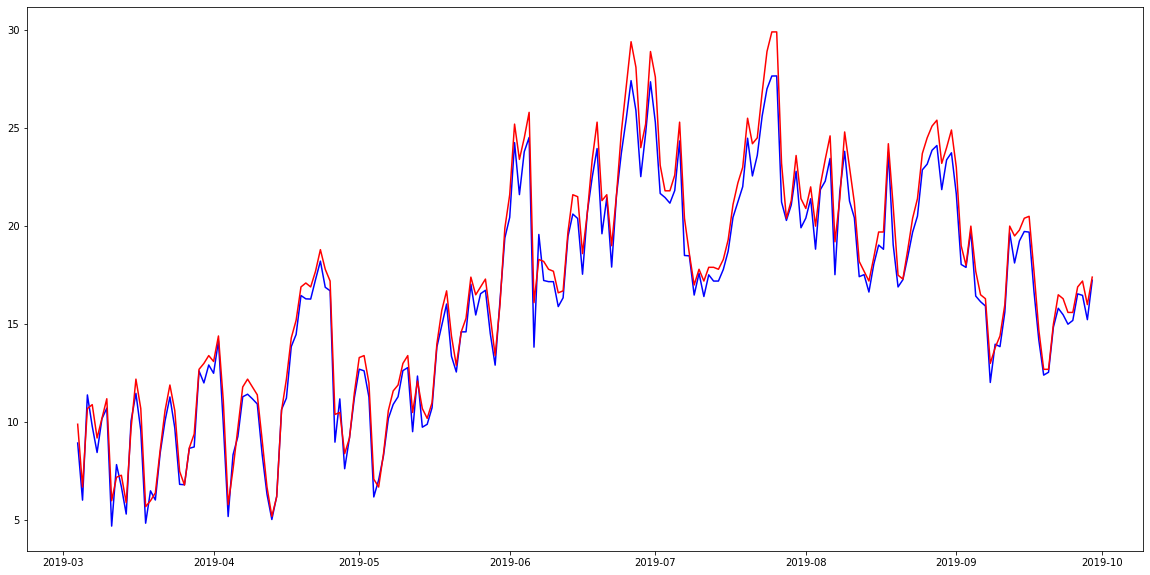

In [36]:
dates2 = np.arange('2019-03-04', '2019-09-30', dtype='datetime64[D]')
plt.plot(dates2, yp, c='blue')
plt.plot(dates2, yt, c='red')

plt.show()

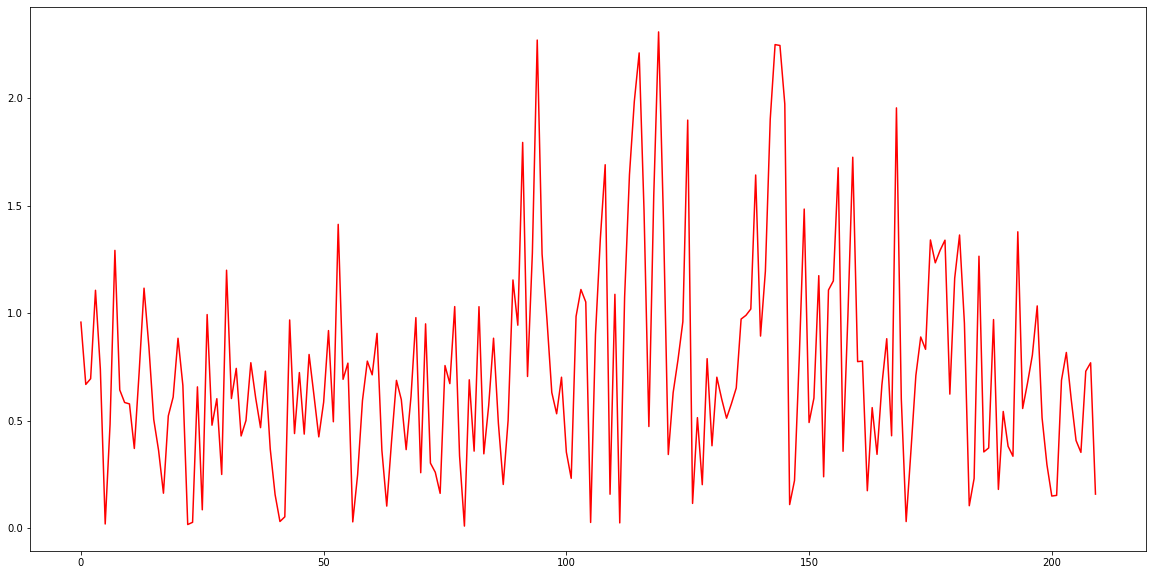

In [24]:
plt.plot(np.arange(len(yt)), np.abs(np.diff([yt, yp], axis=0)).ravel(), c='red')
plt.show()

In [25]:
print('Max abs error:', '%.10f' % np.max(np.abs(np.diff([yt, yp], axis=0).ravel())))
print('Min abs error:', '%.10f' % np.min(np.abs(np.diff([yt, yp], axis=0).ravel())))

Max abs error: 2.3074542516
Min abs error: 0.0095220491


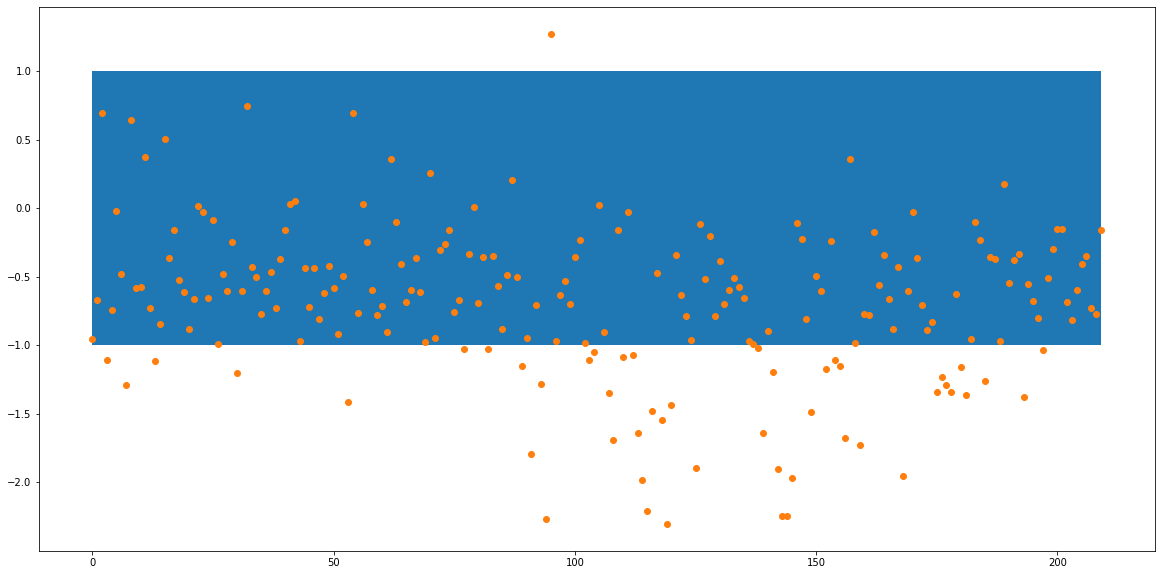

In [37]:
threshold = 1
plt.fill_between(np.arange(len(yp)), -threshold, threshold)
plt.scatter(np.arange(len(yp)), np.diff([yt, yp], axis=0))
plt.show()

In [38]:
ok_values = 0
bad_values = 0

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1
Amount of good values 161
Amount of bad values 49
Percentage good/bad: 0.7666666666666667 / 0.23333333333333334


In [28]:
ok_values = 0
bad_values = 0
threshold = 1.5

diffs = np.diff([np.around(yt), np.around(yp)], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1.5
Amount of good values 191
Amount of bad values 19
Percentage good/bad: 0.9095238095238095 / 0.09047619047619047
